# Decision Trees and Random Forests

Topics:
+ quantify learnability
    + gini impurity and baseline learner
    + entropy as expected surprise
+ decision trees 
+ random forest
+ performance metrics for classification

Datasets:
+ iris50
+ admission
+ breast cancer
+ diabetes

In [2]:
from dtreeviz.trees import dtreeviz
from matplotlib import pyplot
import pandas
import seaborn

In [3]:
iris = pandas.read_csv('../Datasets/iris50.csv')
admission = pandas.read_csv('../Datasets/admission.csv')
cancer = pandas.read_csv('../Datasets/breast-cancer-wisconsin.csv')
diabetes = pandas.read_csv('../Datasets/diabetes.csv')

### Learnability and the degree of learnability

How do we learn? one way is learning using data.

Given a dataset, how difficult it is to learn from this.  Can we quantify it?

In [8]:
setA = iris[['SepalLength','Species']]
setB = iris[['PetalWidth','Species']]

# which is more difficult to learn from?

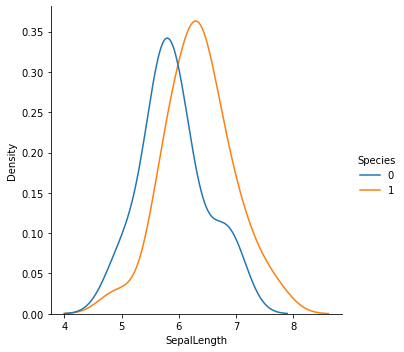

In [11]:
seaborn.displot(data=setA, x='SepalLength', kind='kde', hue='Species')

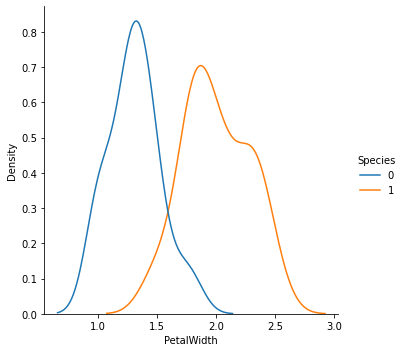

In [12]:
seaborn.displot(data=setB, x='PetalWidth', kind='kde', hue='Species')

Without any feature, we can only look at y.

In [14]:
iris.Species.value_counts(1)

1    0.54
0    0.46
Name: Species, dtype: float64

In [20]:
for i in range(10):
    print(iris.sample(10).Species.value_counts(1))

0    0.5
1    0.5
Name: Species, dtype: float64
0    0.5
1    0.5
Name: Species, dtype: float64
1    0.6
0    0.4
Name: Species, dtype: float64
1    0.6
0    0.4
Name: Species, dtype: float64
1    0.8
0    0.2
Name: Species, dtype: float64
0    0.6
1    0.4
Name: Species, dtype: float64
1    0.5
0    0.5
Name: Species, dtype: float64
0    0.5
1    0.5
Name: Species, dtype: float64
1    0.5
0    0.5
Name: Species, dtype: float64
0    0.6
1    0.4
Name: Species, dtype: float64


1. Surprise 
2. A naive learner makes mistakes.

A dataset is easy to learner
+ If we expect less surprise.
+ If the naive learmer makes few mistakes.


#### Surprise (entropy)

let p is the probabilty of getting 1, (1-p) is the probability of getting 0.

entropy = $p \log {1 \over p} + (1-p) \log {1 \over (1-p)}$


surprise = 1 / probability

Expectation[surprise] = p(s) * How_much_surprise

E[surprise] = $p \log {1 \over p} + (1-p) \log {1 \over (1-p)}$

entropy = expected surprise in the distribution

Some method (e.g. decision tree) utilizes this notion to construct a set of rules to classify data.

#### How likely a baseline learner makes mistakes

+ Zero rule is a possibility.

A reasonable baseline learner is to predict class 1 with probability p.


What is the probability that this baseline learner makes a mistake:

If we randomly draw a data point, prob that it's 1 is p.  Prob(mistake | 1) = p*(1-p).

If we randomly draw a data point, prob that it's 0 is 1-p.  Prob(mistake | 0) = (1-p)*p.

gini impurity = p(1-p) + (1-p)p = probability that our baseline learner makes a mistake.


If a dataset is easy to learn, 
1. the expected surprise is low and 
2. our baseline learner is lesslikely to make a mistake.

In [21]:
iris.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
15,6.1,2.8,4.7,1.2,0
14,7.7,3.0,6.1,2.3,1
38,6.0,2.2,4.0,1.0,0
1,4.9,2.5,4.5,1.7,1
32,6.7,3.0,5.2,2.3,1


In [22]:
admission.sample(5)

,admit,gre,gpa,rank
182,0,700,4.00,2
289,0,420,2.26,4
286,1,800,3.22,1
113,0,600,3.22,1
327,1,560,3.48,2


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.tree import export_text, plot_tree

In [34]:
model = DecisionTreeClassifier(criterion='entropy')
X1 = iris.drop(columns=['Species'])
y1 = iris.Species

X2 = admission.drop(columns=['admit'])
y2 = admission.admit

In [35]:
model.fit(X1,y1)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 199.32, 'X[3] <= 1.75\nentropy = 0.995\nsamples = 50\nvalue = [23, 27]'),
 Text(83.7, 163.07999999999998, 'X[3] <= 1.45\nentropy = 0.529\nsamples = 25\nvalue = [22, 3]'),
 Text(41.85, 126.83999999999999, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(125.55000000000001, 126.83999999999999, 'X[1] <= 2.9\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(83.7, 90.6, 'X[0] <= 6.15\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(41.85, 54.359999999999985, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(125.55000000000001, 54.359999999999985, 'X[2] <= 5.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 90.6, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 163.07999999999998, 'X[2] <= 4.85\nentropy = 0.242\nsamples = 25\nvalue = [1, 24]'),
 Text(209.25, 126.83999

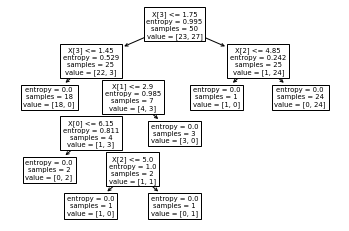

In [36]:
plot_tree(model)

In [33]:
X1.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')